## Matplotlib Mini-Project
### Carbon Emission - CE4

Data Visualization H24
Sacha Vogel

In [385]:
# import all necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter

In [386]:
# load csv by github url
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-21/emissions.csv'
emissions = pd.read_csv(url)

# if any errors occur while reading from github: use following line to read from local csv
# emissions = pd.read_csv('emissions.csv')

In [387]:
# group, sum and sort imported data to display top 10 parent entities by total emissions
grouped_emissions_data = emissions.groupby('parent_entity')['total_emissions_MtCO2e'].sum().reset_index()
emissions_by_entities = grouped_emissions_data.sort_values(by='total_emissions_MtCO2e', ascending=False).head(10)

In [388]:
# prepare data to display total emissions by commodity for China (coal)
relevant_emissions = emissions[['parent_entity', 'total_emissions_MtCO2e', 'commodity', 'year']].copy()
china_emissions = relevant_emissions[relevant_emissions['parent_entity'] == 'China (Coal)']
china_bituminous_emissions = china_emissions[china_emissions['commodity'] == 'Bituminous Coal']
china_metallurgical_emissions = china_emissions[china_emissions['commodity'] == 'Metallurgical Coal']
china_anthracite_emissions = china_emissions[china_emissions['commodity'] == 'Anthracite Coal']
china_lignite_emissions = china_emissions[china_emissions['commodity'] == 'Lignite Coal']

In [389]:
# define colors
background_color = '#fffbee'
text_color = '#252525'
bituminous_color = '#9b2915'
metallurgical_color = '#e9b44c'
anthracite_color = '#1c110a'
lignite_color = '#50a2a7'
parent_entities_color = ['#9b2915'] + ['#e9b44c'] * (len(emissions_by_entities) - 1)

In [390]:
# define methods to format values in plots
def space_format(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

def comma_format(x, pos):
    return '{:,.0f}'.format(x)

In [391]:
# define method to create main and content fiure
def create_content_figures():
    # create main figure for plots
    main_figure = plt.figure(figsize=(15, 6), constrained_layout=True)
    main_figure.suptitle('Analyzing Emissions Trends: A Focus on China (Coal)', fontsize=22, fontweight='bold')
    main_figure.set_facecolor(background_color)
    # create sub figure for content and sub title
    content_figure = main_figure.subfigures()
    content_figure.suptitle('An exploration of the major contributor to global emissions and a detailed look at China (Coal)', fontsize=15)
    return content_figure

In [392]:
def create_old():
    # setup parent entities plot
    parent_entities_plot = content_figure.add_subplot(grid_spec[:, 0])
    parent_entities_plot.set_title('Top 10 Parent Entities by Total Emissions', pad=20, fontsize=16, fontweight='normal')
    parent_entities_plot.set_xlabel('Total Emissions (MtCO2e)', labelpad=20, fontsize=14, fontweight='normal')
    parent_entities_plot.set_ylabel('Parent Entity', labelpad=20, fontsize=14, fontweight='normal')
    parent_entities_plot.set_facecolor(background_color)
    parent_entities_plot.xaxis.set_ticks_position('none')
    parent_entities_plot.yaxis.set_ticks_position('none')
    parent_entities_plot.spines['left'].set_visible(False)
    parent_entities_plot.spines['top'].set_visible(False)
    parent_entities_plot.spines['right'].set_visible(False)
    # fill and adjust data
    parent_entities_plot.barh(emissions_by_entities['parent_entity'], emissions_by_entities['total_emissions_MtCO2e'], color=parent_entities_color)
    for index, value in enumerate(emissions_by_entities['total_emissions_MtCO2e']):
        if (index == 0):
            parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='right', fontsize=10, fontweight='bold', color='white')
        else:
            parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='left', fontsize=10, fontweight='bold')
    parent_entities_plot.invert_yaxis()
    parent_entities_plot.set_xticks(range(0, 275000, 75000))
    return parent_entities_plot

# define method for "top 10 parent entities by total emissions" plot
def create_parent_entities_plot(): 

    # set up plot
    entities_plot = content_figure.add_subplot(grid_spec[:, 0])
    # set titles and labels
    entities_plot.set_title('Top 10 Parent Entities by Total Emissions', pad=20, fontsize=16, fontweight='normal')
    entities_plot.set_xlabel('Total Emissions (MtCO2e)', labelpad=20, fontsize=14, fontweight='normal')
    entities_plot.set_ylabel('Parent Entity', labelpad=20, fontsize=14, fontweight='normal')
    entities_plot.set_facecolor(background_color)
    # configure spines and axis
    entities_plot.xaxis.set_ticks_position('none')
    entities_plot.yaxis.set_ticks_position('none')
    entities_plot.spines['left'].set_visible(False)
    entities_plot.spines['top'].set_visible(False)
    entities_plot.spines['right'].set_visible(False)
    # fill plot with data
    parent_entities_plot.barh(emissions_by_entities['parent_entity'], emissions_by_entities['total_emissions_MtCO2e'], color=parent_entities_color)
    # display values next to bars
    for index, value in enumerate(emissions_by_entities['total_emissions_MtCO2e']):
        if (index == 0):
            parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='right', fontsize=10, fontweight='bold', color='white')
        else:
            parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='left', fontsize=10, fontweight='bold')
    parent_entities_plot.invert_yaxis()
    entities_plot.set_xticks(range(0, 275000, 75000))
    return entities_plot

In [393]:
# define method to create container for "total emissions over time for China (coal) by commodity" plots
def create_china_plot_container():
    # set up plot container for coal plots
    plot_container = content_figure.add_subplot(grid_spec[:, 1:])
    plot_container.set_title('Total Emissions Over Time for China (Coal) by Commodity', pad=title_pad, fontsize=16, fontweight='normal')
    plot_container.set_xlabel('Year', labelpad=35, fontsize=14, fontweight='normal')
    plot_container.set_ylabel('Total Emissions (MtCO2e)', labelpad=50, fontsize=14, fontweight='normal')
    plot_container.set_facecolor(background_color)
    # handle spines and axis
    plot_container.grid(False)
    plot_container.set_xticks([])
    plot_container.set_yticks([])
    plot_container.spines['left'].set_visible(False)
    plot_container.spines['top'].set_visible(False)
    plot_container.spines['right'].set_visible(False)
    plot_container.spines['bottom'].set_visible(False)
    return plot_container

In [394]:
# define method to create a coal emissions plot
def create_emissions_plot(total, year, subplot, yrange, plot_color, title, xaxis_empty=False):
    # set up plot
    emissions_plot = content_figure.add_subplot(subplot)
    emissions_plot.plot(year, total, color=plot_color)
    emissions_plot.fill_between(year, total, color=plot_color, alpha=0.8)
    emissions_plot.set_title(title)
    emissions_plot.set_facecolor(background_color)
    # handle spines and axis
    emissions_plot.spines['left'].set_visible(False)
    emissions_plot.spines['top'].set_visible(False)
    emissions_plot.spines['right'].set_visible(False)
    emissions_plot.xaxis.set_ticks_position('none')
    emissions_plot.yaxis.set_ticks_position('none')
    emissions_plot.tick_params(axis='y', labelsize=11)
    emissions_plot.set_yticks(yrange)
    if xaxis_empty: 
        emissions_plot.spines['bottom'].set_visible(False)
        emissions_plot.set_xticks([])    
    else:
        emissions_plot.set_xticks(range(1945, 2021, 25))
    return emissions_plot

2104    1945
2108    1946
2112    1947
2116    1948
2120    1949
        ... 
2396    2018
2400    2019
2404    2020
2408    2021
2412    2022
Name: year, Length: 78, dtype: int64


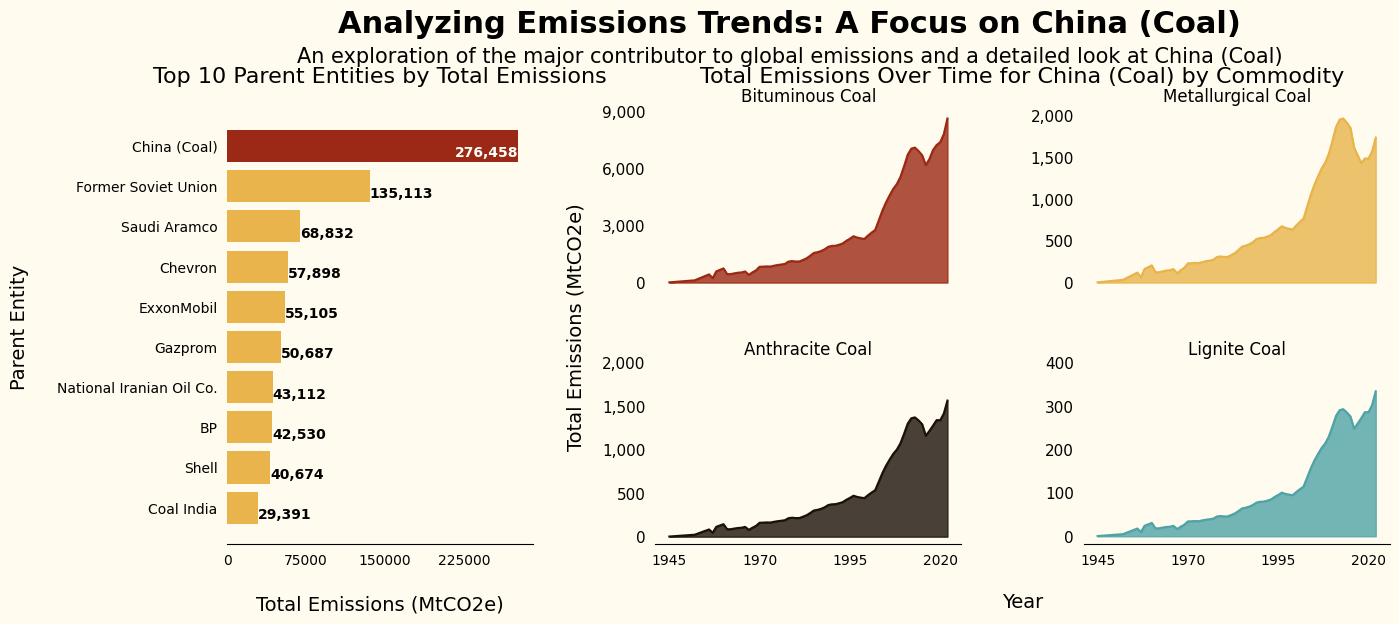

In [395]:
# set up figures
content_figure = create_content_figures()
# set up grid spec
grid_spec = GridSpec(2, 3, wspace=0.4, hspace=0.4) 

# create parent entities plot
parent_entities_plot = create_old()

# create parent china emissions plot
china_emissions_plot_container = create_china_plot_container()

# create Bituminous Coal plot
bituminous_total = china_bituminous_emissions['total_emissions_MtCO2e']
bituminous_year = china_bituminous_emissions['year']
bituminous_plot = create_emissions_plot(bituminous_total, bituminous_year, grid_spec[0,1], range(0, 9001, 3000), bituminous_color, 'Bituminous Coal', xaxis_empty=True)

# create Metallurgical Coal plot
metallurgical_total = china_metallurgical_emissions['total_emissions_MtCO2e']
metallurgical_year = china_metallurgical_emissions['year']
metallurgical_plot = create_emissions_plot(metallurgical_total, metallurgical_year, grid_spec[0,2], range(0, 2001, 500), metallurgical_color, 'Metallurgical Coal', xaxis_empty=True)

# create Anthracite Coal plot
anthracite_total = china_anthracite_emissions['total_emissions_MtCO2e']
anthracite_year = china_anthracite_emissions['year']
anthracite_plot = create_emissions_plot(anthracite_total, anthracite_year, grid_spec[1,1], range(0, 2001, 500), anthracite_color, 'Anthracite Coal')

# create Lignite Coal plot
lignite_total = china_lignite_emissions['total_emissions_MtCO2e']
lignite_year = china_lignite_emissions['year']
lignite_plot = create_emissions_plot(lignite_total, lignite_year, grid_spec[1,2], range(0, 401, 100), lignite_color, 'Lignite Coal')
print(lignite_year)
#lignite_emissions_plot.text(1000, 2104, f'{100:,.0f}', fontsize=11, fontweight='bold', color=lignite_color)
#lignite_emissions_plot.plot(10, 100, marker='o', color=lignite_color)

#plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

#main_figure.subplots_adjust(top=0.75)
#content_figure.subplots_adjust(top=0.3)

for plot in [bituminous_plot, metallurgical_plot, anthracite_plot, lignite_plot]:
    plot.yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.show()